### Agentic RAG

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
# from langchain_openai import OpenAIEmbeddings
from langchain_community.embeddings import OllamaEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
urls=[
    "https://www.langchain.com/langgraph",
    "https://langchain-ai.github.io/langgraph/concepts/why-langgraph/",
    "https://langchain-ai.github.io/langgraph/tutorials/langgraph-platform/local-server/"
]

docs=[WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://www.langchain.com/langgraph', 'title': 'LangGraph', 'description': 'Build controllable agents with LangGraph, our low-level agent orchestration framework. Deploy and scale with LangGraph Platform, with APIs for state management, a visual studio for debugging, and multiple deployment options.', 'language': 'en'}, page_content='LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProducts\n\nFrameworksLangGraphLangChainPlatformsLangSmithLangGraph PlatformResources\n\nResources HubBlogCustomer StoriesLangChain AcademyCommunityExpertsChangelogDocs\n\nPythonLangGraphLangSmithLangChainJavaScriptLangGraphLangSmithLangChainCompany\n\nAboutCareersPricingGet a demoSign upBalance agent control with agencyGain control with LangGraph to design agents that reliably handle complex tasks.Start building\n\nIntroduction to LangGraphLearn the basics of LangGraph in this LangChain Academy Course. You\'ll learn how to build agents that automate real-world tasks with LangGr

In [4]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, chunk_overlap=50
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb
embeddings=(
    OllamaEmbeddings(model="deepseek-r1:8b")  ##by default it ues llama2
)

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


retriever=vectorstore.as_retriever()

/var/folders/pt/bx3t9ncd41x2t3vdmz_c7pvw0000gn/T/ipykernel_2870/1373328446.py:11: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  OllamaEmbeddings(model="deepseek-r1:8b")  ##by default it ues llama2


In [5]:
doc_splits


[Document(metadata={'source': 'https://www.langchain.com/langgraph', 'title': 'LangGraph', 'description': 'Build controllable agents with LangGraph, our low-level agent orchestration framework. Deploy and scale with LangGraph Platform, with APIs for state management, a visual studio for debugging, and multiple deployment options.', 'language': 'en'}, page_content='LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nProducts\n\nFrameworksLangGraphLangChainPlatformsLangSmithLangGraph PlatformResources\n\nResources HubBlogCustomer StoriesLangChain AcademyCommunityExpertsChangelogDocs\n\nPythonLangGraphLangSmithLangChainJavaScriptLangGraphLangSmithLangChainCompany\n\nAboutCareersPricingGet a demoSign upBalance agent control with agencyGain control with LangGraph to design agents that reliably handle complex tasks.Start building'),
 Document(metadata={'source': 'https://www.langchain.com/langgraph', 'title': 'LangGraph', 'description': 'Build controllable agents with LangGraph, our low-level age

In [6]:
retriever.invoke("what is langgraph")

[Document(id='c3ca6295-d64a-43d8-808a-9013297ea098', metadata={'source': 'https://langchain-ai.github.io/langgraph/concepts/why-langgraph/', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Build a custom workflow\n    \n  \n\n\n\n\n\n            Build a custom workflow\n          \n\n\n\n\n\n    Overview\n    \n  \n\n\n\n\n    Overview\n    \n  \n\n\n\n\n      Table of contents\n    \n\n\n\n\n      Learn LangGraph basics\n    \n\n\n\n\n\n\n\n\n    1. Build a basic chatbot\n    \n  \n\n\n\n\n\n    2. Add tools\n    \n  \n\n\n\n\n\n    3. Add memory\n    \n  \n\n\n\n\n\n    4. Add human-in-the-loop\n    \n  \n\n\n\n\n\n    5. Customize state\n    \n  \n\n\n\n\n\n    6. Time travel\n    \n  \n\n\n\n\n\n\n\n\n    Run a local server'),
 Document(id='aa69dd70-e52d-4237-a82f-e43d922a2b65', metadata={'source': 'https://www.langchain.com/langgraph', 'title': 'LangGraph', 'description': 'Build controllable age

In [7]:
### Retriever To Retriever Tools
from langchain.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langgraph"
)

In [8]:
retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x11a879940>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x106a4ed90>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x11af5c9a0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x106a4ed90>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', r

### Langchain Blogs- Seperate Vector Store


In [9]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | \uf8ffü¶úÔ∏è\uf8ffüîó LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1\uf8ffüí¨SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engine

In [10]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


retrieverlangchain=vectorstorelangchain.as_retriever()

In [11]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [12]:
tools=[retriever_tool,retriever_tool_langchain]

In [13]:
tools


[Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x11a879940>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x106a4ed90>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x11af5c9a0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x106a4ed90>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', 

### LangGraph Workflow

In [14]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [15]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama3-8b-8192")

llm.invoke("Hi")

AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.044023736, 'prompt_time': 0.008963798, 'queue_time': 0.789987515, 'total_time': 0.052987534}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'finish_reason': 'stop', 'logprobs': None}, id='run--24145a18-f985-482b-b322-1b13735b1214-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})

In [16]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="llama3-8b-8192")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [17]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [18]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="llama3-8b-8192")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [19]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model="llama3-8b-8192")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [20]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="llama3-8b-8192")
    response = model.invoke(msg)
    return {"messages": [response]}

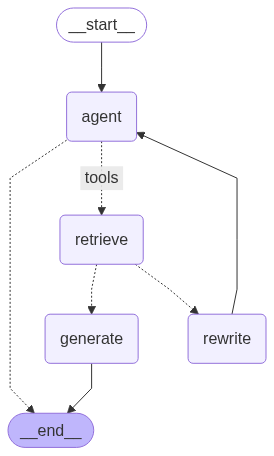

In [21]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [22]:
graph.invoke({"messages":"What is Langgraph?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='777cc81d-0e14-4c5e-a1c5-14df03228863'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'frx275qnn', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 1013, 'total_tokens': 1084, 'completion_time': 0.096339314, 'prompt_time': 0.352731434, 'queue_time': 0.43831271, 'total_time': 0.449070748}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dd5e3ff3-7b1c-4229-967d-6042f063a6cb-0', tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'Langgraph'}, 'id': 'frx275qnn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1013, 'output_tokens': 71, 'total_tokens': 1084}),
  ToolMessage(content='Build expressive, customizable agent workflows.

In [25]:
graph.invoke({"messages":"What is Langchain?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='2a3e1d12-8246-4839-af8b-c53b40e284f6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'kp59y91y4', 'function': {'arguments': '{"query":"What is Langchain?"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 1013, 'total_tokens': 1087, 'completion_time': 0.097858459, 'prompt_time': 0.113095625, 'queue_time': 0.268898085, 'total_time': 0.210954084}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--fd425886-2faf-48ee-ae3a-3f2cd08ac04f-0', tool_calls=[{'name': 'retriever_vector_langchain_blog', 'args': {'query': 'What is Langchain?'}, 'id': 'kp59y91y4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1013, 'output_tokens': 74, 'total_tokens': 1087}),
  ToolMessage(content='LangSmith‚Äã\n

In [24]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='19869830-9d5f-4a19-814c-0391be59e30b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'r8w21fcyv', 'function': {'arguments': '{"query":"What is machine learning?"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 1013, 'total_tokens': 1086, 'completion_time': 0.139396979, 'prompt_time': 0.180264201, 'queue_time': 0.264448849, 'total_time': 0.31966118}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_5b339000ab', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a7fe9f46-6a8e-4b1f-9dc0-5a2bb5e53783-0', tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'What is machine learning?'}, 'id': 'r8w21fcyv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1013, 'output_tokens': 73, 'total_tokens': 1086}),
  ToolMessage(content='LangGrap